# Ev Fiyat Tahmini 

In [12]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

color = sns.color_palette()
sns.set_style('darkgrid')

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [14]:
#ROOT_DIR = "/content/drive/MyDrive/CASGEM-Egitim/Egitim-Part1/Day3-FeatureSelection/notebooks"
ROOT_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining-2nd/main/PART1/Day3-FeatureSelection/notebooks"
DATASET_PATH = ROOT_DIR + "/datasets/"

In [15]:
#Now let's import and put the train and test datasets in  pandas dataframe

train = pd.read_csv(DATASET_PATH+'/house_prices/train.csv')
test = pd.read_csv(DATASET_PATH+'/house_prices/test.csv')


In [16]:
##display the first five rows of the train dataset.
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
##display the first five rows of the test dataset.
test.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
 #check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


#Veri İşleme

##Aykırı Değerler

**GrLivArea**: Metrekare bazında yaşam alanı

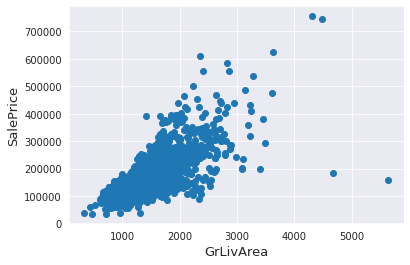

In [20]:
fig, ax = plt.subplots()

ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

plt.show()

Sağ altta son derece büyük `GrLivArea` ile düşük fiyatlı ikisini görebiliriz. Bu değerler gürültü olarak tanımlanır.

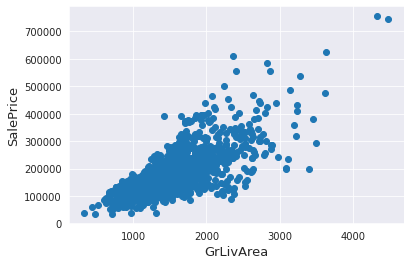

In [21]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()

ax.scatter(train['GrLivArea'], train['SalePrice'])

plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

plt.show()

##Hedef Değişken

**SalePrice**, tahmin etmemiz gereken değişkendir. Öyleyse önce bu değişken üzerinde biraz analiz yapalım.

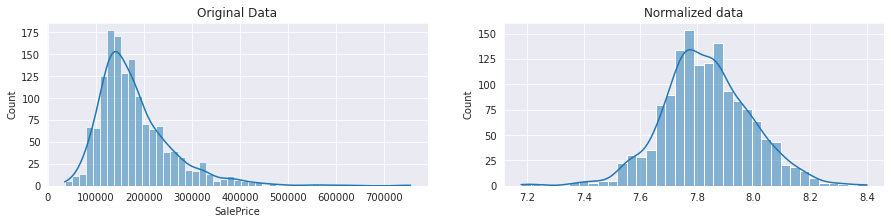

In [22]:
##`scipy.stats` içerisindeki `norm` sınıfını kullanarak eğitim kümesindeki "SalePrice" dağılımının grafiğini çizdiriniz.


# normalize the exponential data with boxcox
normalized_data = stats.boxcox(train["SalePrice"])

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))

sns.histplot(train["SalePrice"], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")

sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [23]:
normalized_data

(array([7.92417344, 7.86996224, 7.95111289, ..., 8.01870404, 7.77294412,
        7.78778903]), -0.07712954824421477)


 mu = 180932.92 and sigma = 79467.79



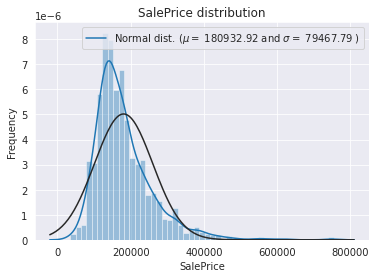

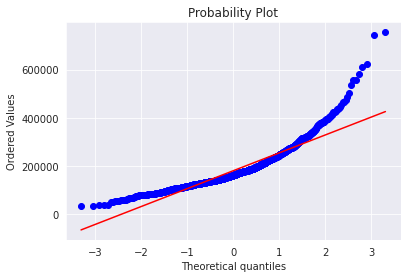

In [10]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [27]:
normalized_data

(array([7.92417344, 7.86996224, 7.95111289, ..., 8.01870404, 7.77294412,
        7.78778903]), -0.07712954824421477)

In [28]:
len(normalized_data[0])

1458

In [29]:
train['SalePrice'] = normalized_data[0]
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,7.924
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,7.870
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7.951
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,7.767
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,7.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,7.856
1456,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,7.927
1457,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,8.019
1458,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,7.773


Hedef değişken sağa çarpık. 
(Doğrusal) modeller normal dağılımlı verileri sevdiğinden, bu değişkeni dönüştürmemiz ve daha normal dağılımlı hale getirmemiz gerekiyor.

**Hedef değişkenin günlük dönüşümü**


 mu = 12.02 and sigma = 0.40



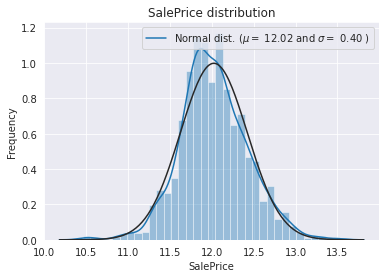

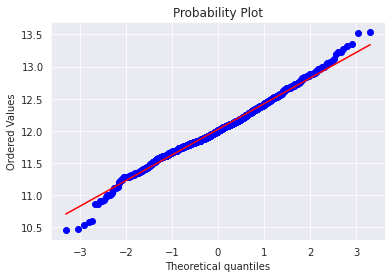

In [11]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


Eğrilik şimdi düzeltilmiş görünüyor ve veriler daha normal dağılmış görünüyor.

##Öznitelik Mühendisliği

Önce train ve test dataframe'lerini birleştirerek tek bir dataframe haline getirelim

In [30]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))


all_data size is : (2917, 79)


###Kayıp Veri (Missing Data)

In [31]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100

all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageFinish,5.451
GarageQual,5.451
GarageCond,5.451
GarageYrBlt,5.451


Text(0.5, 1.0, 'Percent missing data by feature')

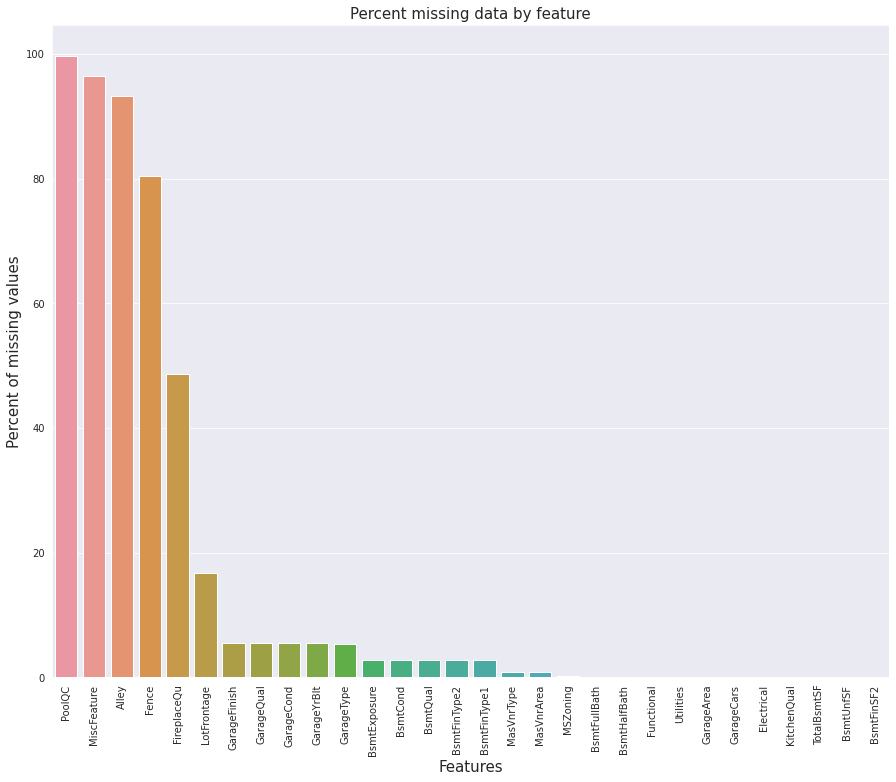

In [32]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')

sns.barplot(x=all_data_na.index, y=all_data_na)

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

**Veri Korelasyonu**

In [35]:
corrmat = train.corr()
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.405,-0.142,0.033,-0.059,0.028,0.041,0.023,-0.074,-0.066,...,-0.013,-0.007,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.072
LotFrontage,-0.405,1.000,0.389,0.235,-0.056,0.117,0.081,0.164,0.147,0.055,...,0.082,0.117,0.015,0.075,0.046,0.116,0.005,0.026,0.008,0.371
LotArea,-0.142,0.389,1.000,0.091,-0.003,0.007,0.008,0.085,0.175,0.114,...,0.169,0.062,-0.017,0.021,0.045,0.036,0.039,0.006,-0.014,0.259
OverallQual,0.033,0.235,0.091,1.000,-0.090,0.571,0.550,0.403,0.222,-0.058,...,0.237,0.297,-0.113,0.031,0.066,0.045,-0.031,0.073,-0.027,0.819
OverallCond,-0.059,-0.056,-0.003,-0.090,1.000,-0.376,0.075,-0.127,-0.043,0.040,...,-0.003,-0.030,0.070,0.025,0.055,0.002,0.069,-0.004,0.044,-0.032
YearBuilt,0.028,0.117,0.007,0.571,-0.376,1.000,0.592,0.313,0.250,-0.049,...,0.224,0.184,-0.387,0.032,-0.050,-0.005,-0.034,0.013,-0.013,0.588
YearRemodAdd,0.041,0.081,0.008,0.550,0.075,0.592,1.000,0.176,0.123,-0.067,...,0.205,0.223,-0.194,0.046,-0.038,-0.003,-0.010,0.022,0.036,0.567
MasVnrArea,0.023,0.164,0.085,0.403,-0.127,0.313,0.176,1.000,0.239,-0.072,...,0.157,0.105,-0.109,0.020,0.063,-0.021,-0.030,-0.004,-0.007,0.429
BsmtFinSF1,-0.074,0.147,0.175,0.222,-0.043,0.250,0.123,0.239,1.000,-0.050,...,0.205,0.073,-0.104,0.029,0.068,0.053,0.005,-0.004,0.016,0.390
BsmtFinSF2,-0.066,0.055,0.114,-0.058,0.040,-0.049,-0.067,-0.072,-0.050,1.000,...,0.068,0.005,0.036,-0.030,0.089,0.046,0.005,-0.015,0.032,0.006


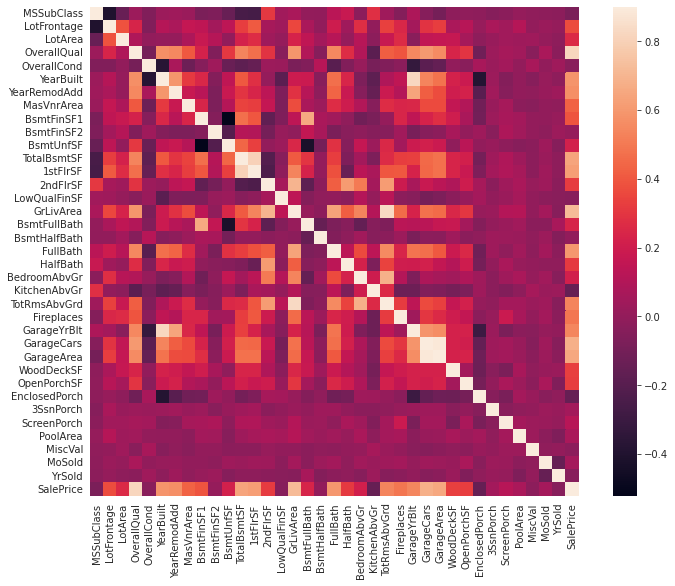

In [33]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

###Eksik Değerleri Tamamlama

- **PoolQC** : verisinin NA olması "Havuz Yok" anlamına geldiğini söylüyor. 
Çok büyük bir kayıp değer oranı (+%99) göz önüne alındığında bu mantıklıdır ve evlerin çoğunda genel olarak hiç Havuz yoktur.

In [36]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

- **MiscFeature** : verisinin NA olması "çeşitli özellik yok" anlamına geldiğini söylüyor.

In [37]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

- **Alley** : verisinin NA olması "ara sokak erişimi yok" anlamına geldiğini söylüyor.

In [38]:
all_data["Alley"] = all_data["Alley"].fillna("None")

- **Fence(Çit)** : verisinin, NA olması "çit yok" anlamına geldiğini söylüyor.

In [39]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : verisinin NA olması "şömine yok" anlamına geldiğini söylüyor.

In [40]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Evin sokakta kapladığı alan, eğer bu değer eksikse sokaktaki diğer evlerin kapladığı alanın ortanca (median) değeri ile doldurulabilir.

In [41]:
all_data.groupby("Neighborhood")["LotFrontage"]

In [42]:
#Mahalleye göre gruplandır ve eksik değeri tüm mahallenin ortanca LotFrontage'ına göre doldur
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual ve GarageCond** : Eksik verileri Yok(None) ile değiştirme

In [43]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea ve GarageCars** : Eksik verilerin 0 ile değiştirilmesi (Garaj alanı yoksa garaj olmadığı için araç da yoktur.)


In [44]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath ve BsmtHalfBath** : bodrum olmadığı için eksik değerler muhtemelen sıfırdır.

In [45]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 ve BsmtFinType2** : Tüm bu kolonlar bodrumla ilgili özniteliklerin NaN değerinde olması bodrum olmadığı anlamına gelir.

In [46]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea ve MasVnrType** : NA büyük olasılıkla bu evler için duvar kaplaması olmadığı anlamına gelir. Alan için 0, tip için None doldurabiliriz.

In [47]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

- **MSZoning (Genel imar sınıflandırması)** : 'RL' açık ara en yaygın değerdir. Böylece eksik değerleri 'RL' ile doldurabiliriz.

Not: Bir dizi değerin modu, en sık görünen değerdir. Birden çok değer olabilir.

In [48]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [49]:
all_data['MSZoning'].mode()

0    RL
dtype: object

In [50]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

- **Utilities** : Bu kategorik özellik için bir "NoSeWa" ve 2 NA hariç tüm kayıtlar "AllPub" şeklindedir. 

'NoSewa' içeren ev eğitim setinde olduğundan, **bu özellik tahmine dayalı modellemeye yardımcı olmaz**. Daha sonra güvenle kaldırabiliriz.

In [51]:
all_data = all_data.drop(['Utilities'], axis=1)

Functional: Ev işlevsellik derecesi
- **Functional** : Verisinin NA olması evin tipik bir ev olduğu anlamına geldiğini söylüyor.

In [52]:
all_data["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [53]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : Bir adet NA değerine sahiptir. Bu öznitelik çoğunlukla 'SBrkr' olduğundan, bu değer ile değiştirebiliriz.

In [54]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

- **KitchenQual**: Yalnızca bir NA değeri ve Electrical ile aynı, KitchenQual'da eksik değer için 'TA' (en sık görülen) belirledik.

In [55]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

- **Exterior1st and Exterior2nd** : İki öznitelik içinde yalnızca bir eksik değer olduğundan en yaynın değeri (mode()) atayabiliriz.


In [56]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

- **SaleType** : En sık kullanılan "WD" ile doldurabiliriz.

In [57]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

- **MSSubClass** : Na büyük olasılıkla Bina sınıfı yok anlamına gelir. Eksik değerleri Yok(None) ile değiştirebiliriz

In [58]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Kalan eksik değer var mı?

In [59]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Eksik değer kalmadı.

**Sahte kategorik özellikler elde etme**

In [60]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 299)


In [71]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000,8450,7,5,2003,2003,196.000,706.000,0.000,...,0,0,0,1,0,0,0,0,1,0
1,20,80.000,9600,6,8,1976,1976,0.000,978.000,0.000,...,0,0,0,1,0,0,0,0,1,0
2,60,68.000,11250,7,5,2001,2002,162.000,486.000,0.000,...,0,0,0,1,0,0,0,0,1,0
3,70,60.000,9550,7,5,1915,1970,0.000,216.000,0.000,...,0,0,0,1,1,0,0,0,0,0
4,60,84.000,14260,8,5,2000,2000,350.000,655.000,0.000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,160,21.000,1936,4,7,1970,1970,0.000,0.000,0.000,...,0,0,0,1,0,0,0,0,1,0
2913,160,21.000,1894,4,5,1970,1970,0.000,252.000,0.000,...,0,0,0,1,1,0,0,0,0,0
2914,20,160.000,20000,5,7,1960,1996,0.000,1224.000,0.000,...,0,0,0,1,1,0,0,0,0,0
2915,85,62.000,10441,5,5,1992,1992,0.000,337.000,0.000,...,0,0,0,1,0,0,0,0,1,0


Getting the new train and test sets. 

In [61]:
train.shape

(1458, 80)

In [62]:
train = all_data[:ntrain]
test = all_data[ntrain:]

#Modelleme

In [63]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Sklearn'in **cross_val_score** fonksiyonunu kullanıyoruz. Ancak bu fonksiyonun karıştırma özelliği olmadığından öncesinde KFold ile karıştırıyoruz.

In [66]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**XGBoost** :

In [64]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



###Model Skoru

Çapraz doğrulama rmsle hatasını değerlendirerek modelin veriler üzerinde nasıl performans gösterdiğini görelim

In [67]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0531 (0.0028)



In [72]:
score

array([0.04886422, 0.05363298, 0.05691648, 0.0514559 , 0.05482615])